<a href="https://colab.research.google.com/github/hung203/NLP/blob/master/Nh%E1%BA%ADn_di%E1%BB%87n_khu%C3%B4n_m%E1%BA%B7t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy scikit-learn matplotlib


In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# Tải bộ dữ liệu Olivetti Faces
data = fetch_olivetti_faces(shuffle=True, random_state=42)

In [ ]:
X = data.images
y = data.target

print("Kích thước ảnh:", X.shape)
print("Kích thước nhãn:", y.shape)

Kích thước ảnh: (400, 64, 64)
Kích thước nhãn: (400,)


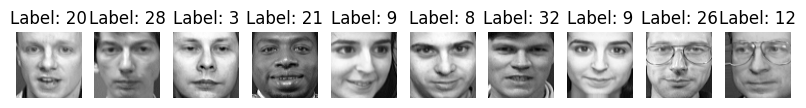

In [ ]:
# Hiển thị một số hình ảnh mẫu
fig, axes = plt.subplots(1, 10, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(X[i], cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis("off")
plt.show()

In [ ]:
# Chuyển đổi ảnh thành vector 1D
X_vectorized = X.reshape((X.shape[0], -1))

In [ ]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

print("Kích thước X_train:", X_train.shape)
print("Kích thước X_test:", X_test.shape)

Kích thước X_train: (320, 4096)
Kích thước X_test: (80, 4096)


In [ ]:
# Tạo mô hình AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=2)
# Thay 'base_estimator' bằng 'estimator'
model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Huấn luyện mô hình
model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   random_state=42)

In [ ]:

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác: {accuracy:.2f}")

# Báo cáo phân loại
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

Độ chính xác: 0.09

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.50      0.33      0.40         3
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       0.25      1.00      0.40         1
          16       0.03      1.00      0.06         2
          17       0.00      0.00      0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


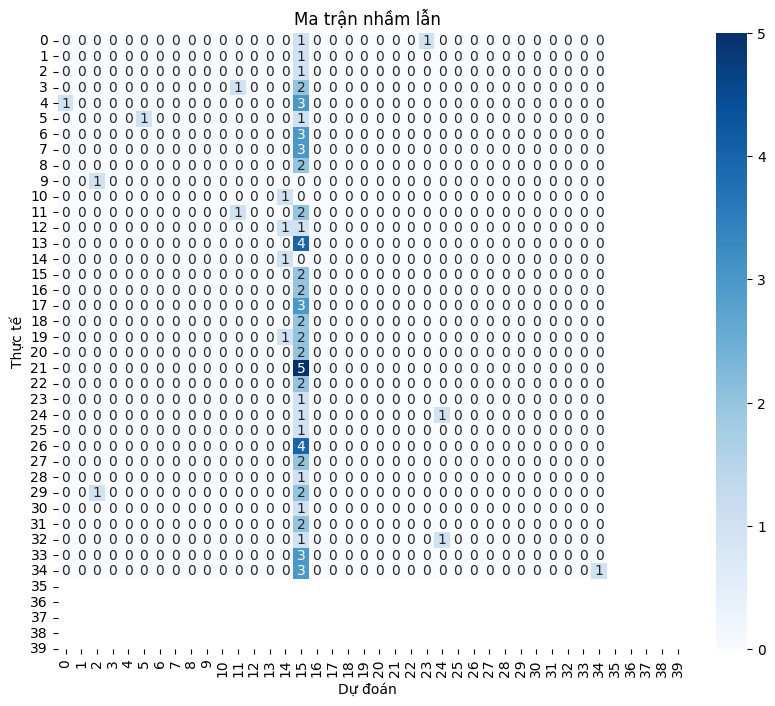

In [ ]:
# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Ma trận nhầm lẫn")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

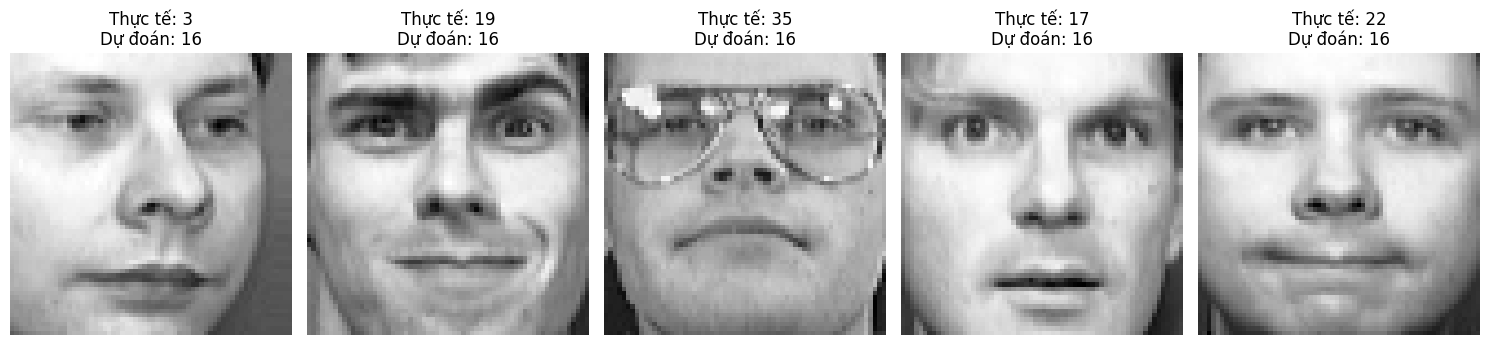

In [ ]:
import matplotlib.pyplot as plt

# Chọn một vài ảnh từ tập kiểm tra
num_samples = 5
indices = np.random.choice(len(X_test), num_samples, replace=False)

# Dự đoán kết quả
sample_images = X_test[indices]
sample_labels = y_test[indices]
predicted_labels = model.predict(sample_images)

# Hiển thị ảnh với nhãn thực tế và nhãn dự đoán
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i].reshape(64, 64), cmap='gray')
    ax.set_title(f"Thực tế: {sample_labels[i]}\nDự đoán: {predicted_labels[i]}")
    ax.axis("off")
plt.tight_layout()
plt.show()


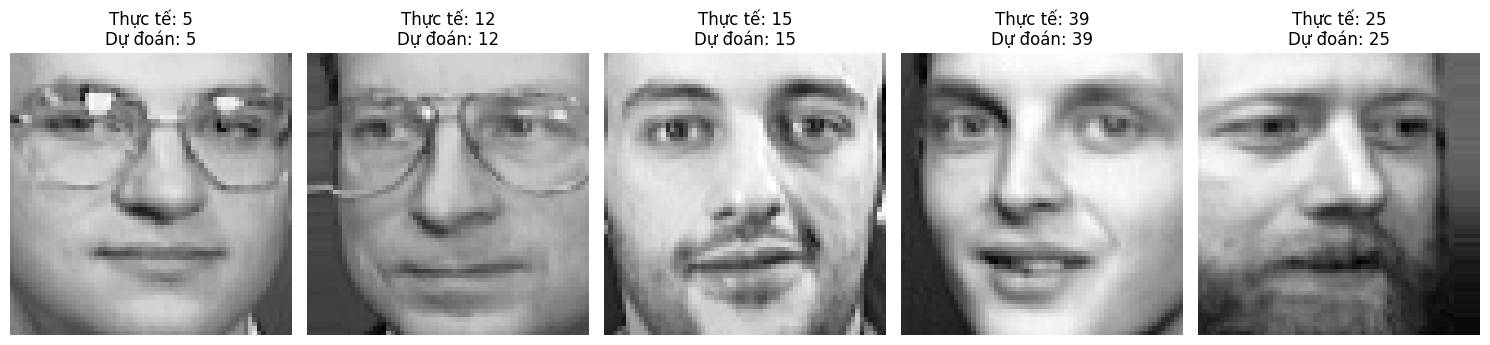

In [ ]:
# Lọc các dự đoán đúng
correct_indices = [i for i in range(len(y_test)) if model.predict([X_test[i]])[0] == y_test[i]]

# Chọn một vài mẫu đúng ngẫu nhiên
num_samples = 5
selected_indices = np.random.choice(correct_indices, num_samples, replace=False)

# Hiển thị các ảnh và kết quả
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i, ax in enumerate(axes):
    index = selected_indices[i]
    ax.imshow(X_test[index].reshape(64, 64), cmap='gray')
    ax.set_title(f"Thực tế: {y_test[index]}\nDự đoán: {y_test[index]}")
    ax.axis("off")
plt.tight_layout()
plt.show()
